<H1>
Finding suitable locations to open a Cinema hall in Bengaluru, INDIA 
</H1>


In [61]:
from geopy.geocoders import Nominatim
import pandas as pd
from pandas.io.json import json_normalize

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
import requests

import numpy as np

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.pyplot import subplots

from sklearn import preprocessing
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [3]:
address = 'Majestic, Bangalore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Majestic are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Majestic are 12.9757079, 77.5728757.


In [5]:

map_maj = folium.Map(location=[latitude, longitude], zoom_start=18)
folium.Marker([latitude, longitude], popup='Majestic centre of Bangalore').add_to(map_maj)
map_maj

In [6]:
cat='4bf58dd8d48988d1fd931735' ##category from foursquare for metro station
CLIENT_ID= ##your client id
CLIENT_SECRET=# your client secret

In [7]:
radius = 40000
VERSION = '20200101' # Foursquare API version
LIMIT = 400
category_id = cat

In [8]:
url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    category_id,
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude, 
    radius,
    LIMIT
)

In [10]:
stations_list = requests.get(url).json()['response']['groups'][0]['items']
stations_init_df = json_normalize(stations_list)

stations_init_df.head()


,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",e-0-4c4c46d49c8d2d7f7ad02e6c-0,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'Metro Station', 'pluralName': 'Metro Stations', 'shortName': 'Metro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_', 'suffix': '.png'}, 'primary': True}]",4c4c46d49c8d2d7f7ad02e6c,Mahatma Gandhi Rd.,IN,Bangalore,India,NaN,3677,"[Mahatma Gandhi Rd., Bangalore 560001, Karnātaka, India]","[{'label': 'display', 'lat': 12.975494856600486, 'lng': 77.60677747428417}]",12.975495,77.606777,NaN,560001,Karnātaka,MG Road Metro Station,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",e-0-4e180c53183880768f3cffda-1,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'Metro Station', 'pluralName': 'Metro Stations', 'shortName': 'Metro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_', 'suffix': '.png'}, 'primary': True}]",4e180c53183880768f3cffda,Trinity Circle,IN,Bangalore,India,"M G Road, Halasuru,",4833,"[Trinity Circle (M G Road, Halasuru,), Bangalore 560001, Karnātaka, India]","[{'label': 'display', 'lat': 12.972948301485474, 'lng': 77.61733977675814}]",12.972948,77.617340,NaN,560001,Karnātaka,Trinity Metro Station,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",e-0-4ea00dca0aaf09533178e13f-2,"[{'id': '4bf58dd8d48988d1fc931735', 'name': 'Light Rail Station', 'pluralName': 'Light Rail Stations', 'shortName': 'Light Rail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/lightrail_', 'suffix': '.png'}, 'primary': True}]",4ea00dca0aaf09533178e13f,at Old Madras Rd,IN,Bangalore,India,Baiyappanahalli,9097,"[at Old Madras Rd (Baiyappanahalli), Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.991302144537357, 'lng': 77.65520811080933}]",12.991302,77.655208,NaN,NaN,Karnātaka,Baiyappanahalli Metro Station,0,[]
3,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",e-0-4cad9c79d1f8b60ca2f76fc6-3,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'Metro Station', 'pluralName': 'Metro Stations', 'shortName': 'Metro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_', 'suffix': '.png'}, 'primary': True}]",4cad9c79d1f8b60ca2f76fc6,CMH Rd,IN,Bangalore,India,Indira Nagar,7138,"[CMH Rd (Indira Nagar), Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.978266443278734, 'lng': 77.63863385967737}]",12.978266,77.638634,NaN,NaN,Karnātaka,Indiranagar Metro Station,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]",e-0-564ca1e7498e50af0d5d149a-4,"[{'id': '4bf58dd8d48988d1fd931735', 'name': 'Metro Station', 'pluralName': 'Metro Stations', 'shortName': 'Metro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/subway_', 'suffix': '.png'}, 'primary': True}]",564ca1e7498e50af0d5d149a,NaN,IN,Bangalore,India,NaN,5623,"[Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.946737524752354, 'lng': 77.5304034763503}]",12.946738,77.530403,NaN,NaN,Karnātaka,Mysore Road Metro Station,0,[]


In [11]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.distance', 'venue.location.postalCode']
stations_filtered_df = stations_init_df.loc[:, filtered_columns]

# filter the category for each row
stations_filtered_df['venue_type'] = stations_init_df['venue.categories'].apply(lambda x: dict(x[0])['name'])

# clean columns
stations_filtered_df.columns = [col.split('.')[-1] for col in stations_filtered_df.columns]

stations_df = stations_filtered_df
stations_df = stations_df.drop('categories', axis=1)
stations_df.head(10)

,name,lat,lng,distance,postalCode,venue_type
0,MG Road Metro Station,12.975495,77.606777,3677,560001,Metro Station
1,Trinity Metro Station,12.972948,77.617340,4833,560001,Metro Station
2,Baiyappanahalli Metro Station,12.991302,77.655208,9097,NaN,Light Rail Station
3,Indiranagar Metro Station,12.978266,77.638634,7138,NaN,Metro Station
4,Mysore Road Metro Station,12.946738,77.530403,5623,NaN,Metro Station
5,Kempegowda Metro Station,12.976134,77.571482,158,NaN,Metro Station
6,Bangalore City Metro Station,12.975862,77.565700,778,560023,Metro Station
7,Chickpet Metro Station,12.966987,77.574840,993,560053,Metro Station
8,Shri M Visvesvaraya Metro Station,12.974097,77.584015,1221,NaN,Metro Station
9,Mantri Square Sampige Road Metro Station,12.991217,77.570917,1739,560003,Metro Station


In [13]:
# create map of Athens using latitude and longitude values
map_metro = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, name in zip(stations_df['lat'],
                          stations_df['lng'],
                          stations_df['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map_metro)
    
map_metro

In [14]:
categoryId = '4bf58dd8d48988d17f941735' ## for cinema halls

In [25]:
def getNearbyCH(categoryId, stations, latitudes, longitudes, radius=750):
    
    print('Findind theatres near metro stations, please wait...\n')
    
    ch_list=[]
    for station, lat, lng in zip(stations, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            categoryId,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby theatre
        ch_list.append([(
            station,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']
        ) for v in results])

    nearby_ch_df = pd.DataFrame([item for venue_list in ch_list for item in venue_list])
    nearby_ch_df.columns = [
                  'station',
                  'lat',
                  'lng',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Distance from Station',
                  'Venue Category']
    print('Finished')
    return(nearby_ch_df)

In [26]:
venues_df = getNearbyCH(categoryId, stations=stations_df['name'], latitudes=stations_df['lat'], longitudes=stations_df['lng'])

Findind theatres near metro stations, please wait...

Finished


In [27]:
venues_df.head()

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station,Venue Category
0,MG Road Metro Station,12.975495,77.606777,Swagath ONYX Theatre,12.974606,77.609505,311,Movie Theater
1,MG Road Metro Station,12.975495,77.606777,Fame Shankarnag,12.974602,77.609400,301,Movie Theater
2,MG Road Metro Station,12.975495,77.606777,BRV Theatre,12.979410,77.602287,653,Movie Theater
3,MG Road Metro Station,12.975495,77.606777,INOX Magrath Road,12.970127,77.609968,690,Multiplex
4,MG Road Metro Station,12.975495,77.606777,Screen 2,12.970259,77.609950,676,Multiplex


In [28]:
venues_min_df = pd.merge(venues_df,
                              pd.DataFrame(venues_df.groupby('station')['Distance from Station'].min()),
                              on='station', how='inner')

In [29]:
venues_min_df.groupby(['station']).count()

,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y
station,,,,,,,,
Banashankari Metro Station,1,1,1,1,1,1,1,1
Bangalore City Metro Station,1,1,1,1,1,1,1,1
Byappanahalli Metro Station,1,1,1,1,1,1,1,1
Chickpet Metro Station,2,2,2,2,2,2,2,2
Cubbon Park Metro Station,4,4,4,4,4,4,4,4
Dasarahalli metro station,2,2,2,2,2,2,2,2
Hosahalli Metro,2,2,2,2,2,2,2,2
Indiranagar Metro Station,1,1,1,1,1,1,1,1
Kempegowda Metro Station,5,5,5,5,5,5,5,5


In [30]:
venues_min_df.head(20)

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y
0,MG Road Metro Station,12.975495,77.606777,Swagath ONYX Theatre,12.974606,77.609505,311,Movie Theater,301
1,MG Road Metro Station,12.975495,77.606777,Fame Shankarnag,12.974602,77.609400,301,Movie Theater,301
2,MG Road Metro Station,12.975495,77.606777,BRV Theatre,12.979410,77.602287,653,Movie Theater,301
3,MG Road Metro Station,12.975495,77.606777,INOX Magrath Road,12.970127,77.609968,690,Multiplex,301
4,MG Road Metro Station,12.975495,77.606777,Screen 2,12.970259,77.609950,676,Multiplex,301
5,MG Road Metro Station,12.975495,77.606777,Screen 4 INOX Garuda,12.970080,77.609938,693,Multiplex,301
6,MG Road Metro Station,12.975495,77.606777,Garuda Mall,12.970140,77.609978,689,Shopping Mall,301
7,Trinity Metro Station,12.972948,77.617340,Fame Lido Mall,12.972786,77.616417,101,Movie Theater,101
8,Trinity Metro Station,12.972948,77.617340,Inox Lido Mall,12.973078,77.621315,431,Multiplex,101
9,Trinity Metro Station,12.972948,77.617340,Fame Lido,12.973042,77.621498,451,Multiplex,101


In [32]:
print('All stations mean distance from any theatre: ', venues_min_df['Distance from Station_y'].mean())
print('All stations maximum distance from any theatre: ',venues_min_df['Distance from Station_y'].max())
print('All stations minimum distance from any theatre: ', venues_min_df['Distance from Station_y'].min())

All stations mean distance from any theatre:  322.44303797468353
All stations maximum distance from any theatre:  729
All stations minimum distance from any theatre:  1


In [38]:
venues_min_df['Norm Min Distance from Station'] = (venues_min_df['Distance from Station_y'] - \
                                                              venues_min_df['Distance from Station_y'].mean()) / \
                                                             (venues_min_df['Distance from Station_y'].max() - \
                                                              venues_min_df['Distance from Station_y'].min())

In [41]:
venues_min_df.reset_index(drop=True, inplace=True)

In [44]:
venues_min_df.head(10)

,station,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y,Norm Min Distance from Station
0,MG Road Metro Station,12.975495,77.606777,Swagath ONYX Theatre,12.974606,77.609505,311,Movie Theater,301,-0.029455
1,MG Road Metro Station,12.975495,77.606777,Fame Shankarnag,12.974602,77.609400,301,Movie Theater,301,-0.029455
2,MG Road Metro Station,12.975495,77.606777,BRV Theatre,12.979410,77.602287,653,Movie Theater,301,-0.029455
3,MG Road Metro Station,12.975495,77.606777,INOX Magrath Road,12.970127,77.609968,690,Multiplex,301,-0.029455
4,MG Road Metro Station,12.975495,77.606777,Screen 2,12.970259,77.609950,676,Multiplex,301,-0.029455
5,MG Road Metro Station,12.975495,77.606777,Screen 4 INOX Garuda,12.970080,77.609938,693,Multiplex,301,-0.029455
6,MG Road Metro Station,12.975495,77.606777,Garuda Mall,12.970140,77.609978,689,Shopping Mall,301,-0.029455
7,Trinity Metro Station,12.972948,77.617340,Fame Lido Mall,12.972786,77.616417,101,Movie Theater,101,-0.304180
8,Trinity Metro Station,12.972948,77.617340,Inox Lido Mall,12.973078,77.621315,431,Multiplex,101,-0.304180
9,Trinity Metro Station,12.972948,77.617340,Fame Lido,12.973042,77.621498,451,Multiplex,101,-0.304180


In [47]:
clustering_df = venues_min_df.drop(['station', 'lat', 'lng', 'Distance from Station_y'], 1)

In [48]:
map_chss1 = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, name in zip(clustering_df['Venue Latitude'],
                          clustering_df['Venue Longitude'],
                         clustering_df['Venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(map_chss1)
    
map_chss1


In [49]:
new_movie =clustering_df .drop(['Venue','Venue Latitude','Venue Longitude','Distance from Station_x','Venue Category'],1)

In [50]:
new_movie.head(30)

,Norm Min Distance from Station
0,-0.029455
1,-0.029455
2,-0.029455
3,-0.029455
4,-0.029455
5,-0.029455
6,-0.029455
7,-0.304180
8,-0.304180
9,-0.304180


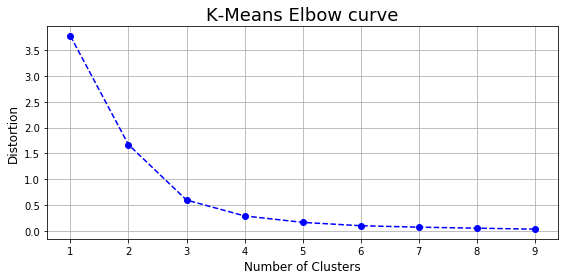

In [51]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

distorsions = []
for k in range(1, 10):
    kmeans = KMeans(init="k-means++", n_clusters=k, random_state=0, n_init = 12, max_iter=300, tol=0.00001)
    kmeans.fit(new_movie)
    distorsions.append(kmeans.inertia_)

fig, ax = subplots(figsize=(8, 4))
ax.plot(range(1, 10), distorsions, '--bo')
ax.set_xlabel('Number of Clusters', fontsize=12)
ax.set_ylabel('Distortion', fontsize=12)
plt.grid(True)
plt.title('K-Means Elbow curve', fontsize='18')
plt.tight_layout()
plt.show()

In [52]:
kmeans = KMeans(init="k-means++", n_clusters=3, random_state=0, n_init = 12, max_iter=300, tol=0.0001)
kmeans.fit(new_movie)

kmeans.labels_


array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [54]:
venues_min_df.insert(1, 'Cluster Label', kmeans.labels_)

In [55]:
venues_min_df.head(13)

,station,Cluster Label,lat,lng,Venue,Venue Latitude,Venue Longitude,Distance from Station_x,Venue Category,Distance from Station_y,Norm Min Distance from Station
0,MG Road Metro Station,0,12.975495,77.606777,Swagath ONYX Theatre,12.974606,77.609505,311,Movie Theater,301,-0.029455
1,MG Road Metro Station,0,12.975495,77.606777,Fame Shankarnag,12.974602,77.609400,301,Movie Theater,301,-0.029455
2,MG Road Metro Station,0,12.975495,77.606777,BRV Theatre,12.979410,77.602287,653,Movie Theater,301,-0.029455
3,MG Road Metro Station,0,12.975495,77.606777,INOX Magrath Road,12.970127,77.609968,690,Multiplex,301,-0.029455
4,MG Road Metro Station,0,12.975495,77.606777,Screen 2,12.970259,77.609950,676,Multiplex,301,-0.029455
5,MG Road Metro Station,0,12.975495,77.606777,Screen 4 INOX Garuda,12.970080,77.609938,693,Multiplex,301,-0.029455
6,MG Road Metro Station,0,12.975495,77.606777,Garuda Mall,12.970140,77.609978,689,Shopping Mall,301,-0.029455
7,Trinity Metro Station,2,12.972948,77.617340,Fame Lido Mall,12.972786,77.616417,101,Movie Theater,101,-0.304180
8,Trinity Metro Station,2,12.972948,77.617340,Inox Lido Mall,12.973078,77.621315,431,Multiplex,101,-0.304180
9,Trinity Metro Station,2,12.972948,77.617340,Fame Lido,12.973042,77.621498,451,Multiplex,101,-0.304180


In [58]:
cluster_colors = ['orange', 'red', 'blue'] 

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

markers_colors = []
for lat, lon, poi, cluster in zip(venues_min_df['lat'], venues_min_df['lng'], 
                                  venues_min_df['station'], venues_min_df['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster + 1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters